<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/hw/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-201 ABC PROBLEM SET #3
**Due on Wednesday, September 21, at 5:00 p.m.**

**I - INSTRUCTIONS**  
To successfully complete this problem set, please follow these steps:

1. **Create a copy of this Jupyter notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!***
    1. Remember to save your work frequently by pressing `command-S` or clicking `File > Save` in the menubar.
    1. We recommend completing this problem set in Google Chrome.
2. **Insert all your answers into your copy of the document.** 
    1. Please include every portion of your submission in this document unless a separate electronic file is explicitly requested. 
    3. All numerical calculations should be done in the notebook itself, using R code. If you have to do calculations by hand, include a picture of your handwritten work.
    2. To add an image of handwritten work, screenshots, or anything else, add a new text cell and click the small image icon in the menubar above the cell. After inserting an image, press the `esc` key to show the image. If you have trouble with this method, upload your image to [Freeimage.host](https://freeimage.host), copy a Markdown link, and paste it in a text cell.
3. **Once your document is complete, please save and submit the notebook on Canvas as a PDF.** 
    1. Click `View > Expand sections` in the menubar to make sure all work is visible (if it is greyed out then it is already visible).
    1. Click `Runtime > Run all` in the menubar to make sure all of your code is executed.
    1. Click `File > Print` in the menubar and choosing the `Save as PDF` option in Chrome to export your notebook as a PDF, and submit it on Canvas.


**II - IDENTIFICATION**
1. **Your Full Name:** `     `  

2. **Group Members (classmates with whom you worked on this problem set):**  
    1. `     `
    2. `     `
    3. `     `
    4. `     `
    
3. **Compliance with HKS Academic Code**  
We abide by the Harvard Kennedy School Academic code for all aspects of the course. In terms of problem sets, unless explicitly written otherwise, the norms are the following: You are free (and encouraged) to discuss problem sets with your classmates. However, you must hand in your own unique written work and code in all cases. Any copy/paste of another’s work is plagiarism. In other words, you may work with your classmate(s), sitting side-by-side (physically or remotely!) and going through the problem set question by question, but you must each type your own answers and your own code. For more details, please see syllabus.

    **I certify that my work in this problem set complies with the HKS Academic Code**
    - [ ] Yes
    - [ ] No

---

# A note on Jupyter notebooks and this Problem Set

This will be the first problem set where we move from the FAS OnDemand service to [Google Colaboratory](https://colab.research.google.com/), a Google-hosted Jupyter notebooks service. All R code runs the same in these notebooks as they did on FAS OnDemand, but there are some subtle differences in the interface. Though we understand that there are costs associated with switching to this service, the OnDemand service has proven sufficiently unreliable to make these costs worth it.

Throughout this problem set, we will include notes related to differences between this interface and the FAS OnDemand interface. Also, please do not hesitate to use the [#r channel on Slack](https://api-201-2022.slack.com/archives/C03Q35HVDNF) with additional questions related to using these notebooks as they arise.

Again, we apologize for the frustration associated with these changes. To lessen the burden on you, we will be dropping your lowest *two* problem set grades instead of just one. We highly encourage you to complete all problem sets for your learning and to prepare for exams, we hope that this will ease some of the pressure that you are facing this semester.

The API-201 Teaching Team

## Saving this problem set

First, we highly encourage you to use [Google Chrome](https://www.google.com/chrome/dr/download/) or another chromium-based browser such as [Brave](https://brave.com/)

Similar to FAS OnDemand, The file you're currently looking at is "read-only" - you can't save edits to it since it's the file that all students have access to. So, you'll need to copy this file to your own Google Drive.

You can do this by clicking the `Copy to Drive` button in the menubar. We suggest renaming the notebook using the following naming convention: "`hw3-lastname-firstname`". 

You're ready to get started!

## Adding images

The most cumbersome part of using Google Colab is uploading images, which you may end up doing a lot if you want to show pictures of your handwritten work. If you would like to insert an image of your handwriting to show your work, click on the `+ Text` button at the top of this window to create a new cell. Then click the small image icon in the text cell's menubar, and add your image. 

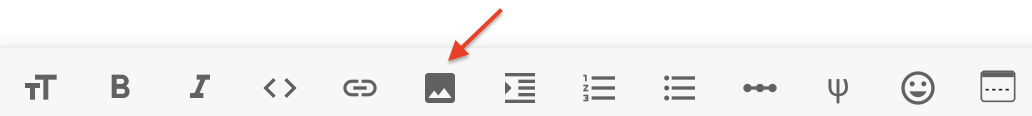

When you do this, your text cell will become filled with a string of letters and numbers - don't panic! Just press the `esc` key on your keyboard to exit out of the cell and show the image (you can double click the image above to see what it will look like; press `esc` to exit out of it). We recommend creating a new text cell for each image you have to insert to make it easier to navigate your notebook (if you're interested in knowing what's happening, Google is actually encoding your image as text in [base64](https://www.keycdn.com/support/image-base64-encoding)).

If your image file is large (> 1.5 MB or so), your browser tab may get stuck and reload itself. If you find yourself encountering this issue, you can go to website [Freeimage.host](https://freeimage.host/) and upload the image there. It will then provide you with some code to copy a link - copy the code for "Markdown full linked" and paste it into the text cell. Here's an example:

[![PUZYEG.md.png](https://iili.io/PUZYEG.md.png)](https://freeimage.host/i/PUZYEG)

## Load `R` libraries and data
The code cell below imports the R tidyverse and creates a dataframe that we will be using for the first question. Make sure to run it before starting the problem set!

*Note: Click the "play" button that appears when you hover over a cell to run it. The first time you do this you may receive an alert that this notebook was not authored by Google. If so, click "Run anyway" to proceed.*

In [ ]:
library(tidyverse)
set.seed(1)
telework_survey <- tibble(
    Education = c(
        rep('Less than a high school diploma', 201 + 8341),
        rep('High school graduate, no college', 1515 + 31958),
        rep('Some college or associate degree', 3239 + 30372),
        rep('Bachelor\'s degree only', 8141 + 27754),
        rep('Advanced degree', 6558 + 15988)),
    Teleworked = c(
        c(rep(TRUE, 201), rep(FALSE, 8341),
          rep(TRUE, 1515), rep(FALSE, 31958),
          rep(TRUE, 3239), rep(FALSE, 30372),
          rep(TRUE, 8141), rep(FALSE, 27754),
          rep(TRUE, 6558), rep(FALSE, 15988)))
    ) %>% 
    mutate(Education = fct_relevel(Education, unique(Education))) %>%
    slice_sample(n=1e4)

---

# Table of Contents

Now that we are using Google Colab, you can click the icon of a bulleted list on the top left of the window to see a live outline for the problem set that you can navigate:


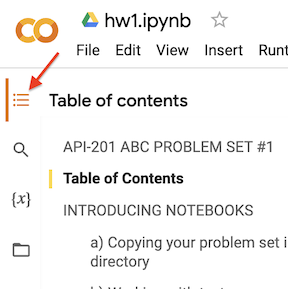
---

# PART I: TELEWORK DURING THE PANDEMIC

The U.S. Bureau of Labor Statistics (BLS), through the Current Population Survey (CPS), has recently been gathering supplement data on the effects of the coronavirus pandemic on the U.S. job market. 

BLS estimates that there were 134,068,000 employed persons at least 25 years old in the United States in August 2021. Imagine that we surveyed a random sample of 10,000 of these individuals, asking them their level of educational attainment, and if they "teleworked or worked at home for pay at any time in the last 4 weeks because of the coronavirus pandemic."

_Note: We will use the shorthand "teleworked due to the pandemic" to mean "teleworked or worked at home for pay in the last 4 weeks because of the coronavirus pandemic." The hypothetical survey results are generated based on  BLS Table 1, August 2021, available [here](https://www.bls.gov/cps/covid19/covid19-table1-2020-08.xlsx)._



#### Survey results
Categorizing the 10,000 survey respondents by their educational level and telework behavior, we get the following results (run the cell below):

In [ ]:
telework_survey %>%
    group_by(Education) %>%
    summarize(
        `Did telework` = sum(Teleworked),
        `Did not telework` = sum(!Teleworked)
    )

**a. Among the 10,000 people who answered the survey, suppose we select one of them at random.** 

*i. Use the table above to calculate the probability that the randomly selected person said that they teleworked due to the pandemic. Hint: use R as a calculator!*

*Note: You can click on a code cell to edit it, and press command-enter to run it. Press the `esc` key to exit out of it.*

In [ ]:
# Your answer here!



*ii. Is this a joint, marginal, or conditional probability?*

*Note: You can double click on a text cell to edit it. When you do so you'll see a "split screen" - the box where you can edit text on the left, and a preview of how it will look on the right. Press the `esc` key to exit out of the cell.*

`Your answer here!`



**b. The individual survey responses are stored in `telework_survey` and have the following structure (run the cell below):**

In [ ]:
head(telework_survey, 10)

Repeat the calculation in part (a), but this time use the individual survey responses stored in `telework_survey`. 

_Hint: You can compute the proportion of `True` values in a column using the `mean` function. You should obtain the same result as in part (a)._

In [ ]:
# Your answer here!



**c. What is the probability that a randomly selected survey respondent has an advanced degree _and_ teleworked due to the pandemic? Compute this in two ways, first using the table above, and then directly using the individual-level survey responses. Is this a joint, marginal, or conditional probability?**

_Hint: You can compute the proportion of `True` values in a column using the `mean` function. You should obtain the 
same result under both ways._

*i. Calculation using the table*

In [ ]:
# Your answer here!


*ii. Calculation using the dataset*

In [ ]:
# Your answer here!


*iii. Is this a joint, marginal, or conditional probability?*

`Your answer here!`



**d. Suppose that the person you randomly selected did not attend college. What is the probability that the person teleworked due to the pandemic? Again compute this in two ways, first using the table above, and then directly using the individual level survey responses. Is this a joint, marginal, or conditional probability?**

_Hint: When computing the answer directly using the survey responses, first `filter` to the subset of respondents who did not attend college, and then `summarize` the data to get the answer. You should obtain the same result under both ways._

*i. Calculation using the table*

In [ ]:
# Your answer here!



*ii. Calculation using the dataset*

In [ ]:
# Your answer here!



*iii. Is this a joint, marginal, or conditional probability?*

`Your answer here!`



**e. Suppose you and several colleagues are working for a policymaker who is interested in understanding patterns of telework due to the pandemic.  There is disagreement among your colleagues on the issue.  Two of your colleagues exclaim the following:**

- Colleague 1: “More than half of the workers who teleworked due to the pandemic have a bachelor’s degree or more!”  
- Colleague 2: “But less than half of workers with a bachelor’s degree or more teleworked due to the pandemic!”

You recognize that both of your colleagues are correct.  But your supervisor (who did not take API-201) is confused by the apparent contradiction in these statements.

Reconcile your two colleagues’ statements in language your statistics instructor would understand.  Please use probability notation as part of your explanation (2-3 sentences).

`Your answer here!`



**f. Reconcile your two colleagues’ statements in language your supervisor would understand. Please use plain language, not probability notation (2-3 sentences).**

`Your answer here!`



# PART II: TESTING FOR COVID-19

The goal of this question is to help you develop your ability to use statistics (and specifically Bayes’ Rule) to better understand COVID-19 testing. First, a brief primer on COVID tests.

> **A primer on COVID tests**
>
> There are two types of tests: diagnostic tests and antibody tests. A diagnostic test aims at detecting whether the person currently has an active coronavirus infection. Currently there are two types of diagnostic tests that can detect the virus – molecular tests, such as RT-PCR tests, that detect the virus’s genetic material, and antigen tests that detect specific proteins on the surface of the virus. 
>
> An antibody (serology) test aims at detecting whether the person had an infection, by assessing whether the person has developed antibodies against the virus. If test results show that the person has antibodies, it indicates that the person was likely infected with COVID-19 at some time in the past. 
> 
> *Sources: [FDA](https://www.fda.gov/consumers/consumer-updates/covid-19-test-basics), [Mayo clinic](https://www.mayoclinic.org/diseases-conditions/coronavirus/expert-answers/covid-antibody-tests/faq-20484429)*

We will analyze antigen self-tests, which are diagnostic tests that can be administered quickly and provide rapid results. (Most if not all of you have probably taken them!) We will focus on one of the tests, Abbot’s BinaxNOW self-test, which was one of the first self-tests to be approved by the FDA and available for purchase in stores and online.

When it launched the test, Abbott reported that the test had a specificity (P(Negative Test | No COVID)) of 98.5% and a sensitivity (P(Positive Test | COVID)) of 84.6% ([source](https://abbott.mediaroom.com/2021-03-31-Abbotts-BinaxNOW-TM-Rapid-Antigen-Self-Test-Receives-FDA-Emergency-Use-Authorization-for-Asymptomatic-Over-the-Counter-Non-Prescription-Multi-Test-Use)).  Assume that the prevalence of COVID-19 (i.e., the proportion of people who are currently infected) is 1% in your population of interest.

### 1. Calculating probabilities

**a. Suppose that a random person from this population is tested (for example, as part of a universal testing program) and that the test is positive. Calculate the probability that the person is infected (i.e. P(COVID|+)). This number is sometimes called the “positive predictive value of the test.”  Note: For this question and all questions, please be sure to show your work (for example, in a table or using the Bayes’ Rule formula).**


*Note: See the "Adding Images" note at the top of the problem set for guidance on uploading handwritten work.*


`Your answer here!`



**b. Is the result in (a) substantially different than the ones we got for mammograms in class? If so, explain why this is the case. If not, explain why not. [2-3 sentences]**

`Your answer here!`



**c. Suppose the test is negative.  Calculate the probability that the person is not infected (i.e. $P(COVID^C|-)$). This number is sometimes called the “negative predictive value of the test.**

*Note: You can verify your results in (a) and (c) by using this nice [tool](https://graphics.wsj.com/dynamic-inset-iframer/?url=https://asset.wsj.net/wsjnewsgraphics/dice/antibody-test-reliability-calculator-433fb3e7-60e4-4bb9-aaa1-1f268cd14a0a/inset.json) that also illustrates the intuition of the test results.*

`Your answer here!`



### 2. Simulating probabilities

**a. Instead of using math, we can answer Question 1a via simulation. We are going to break this question into several parts and then calculate conditional probabilities running simulations.**

We want to: 
<br> i) Generate a dataframe with 1,000,000 rows. 
<br> ii) In column 1, randomly assign COVID status.
<br> iii) In column 2, randomly assign test status given the COVID status from column 1.

Run the cell below, which assigns parameters that will be used to create the simulated data. In the subsequence steps, you can simply reference the variable instead of the number (for example, instead of typing `0.01` you can just type `covid_rate`)

In [ ]:
set.seed(1)
        
# Parameters

## Number of observations 
n <- 1e6

## Prevalence of COVID
covid_rate <- 0.01

# Probability of testing positive given that the person is infected
prob_testpos_given_covidpos <- 0.846

# Probability of testing positive given that the person doesn't have COVID: 1-P(-|COVID^C)
prob_testpos_given_covidneg <- 1 - 0.985

*i. Step 1: Randomly assign covid status. Call this vector of covid statuses `covid_status`.*

_Hint: You can use `rbernoulli` to randomly assign covid status based on the COVID rate. Syntax: rbernoulli( number of observations , proportion of COVID cases )._

In [ ]:
# Your answer here!



*ii. Step 2: Create a vector of probabilities of testing positive conditional on COVID status. Call this vector `test_status_p`.*

_Hint: You can use `if_else` to assign probabilities of testing positive based on COVID status. Syntax: if_else( vector with covid status , probability of testing positive if the person has COVID, probability of testing positive if the person does not have COVID). For example, if we had 5 observations, we would assign probabilities in the following manner:_

|  | COVID status | probability of testing positive
| --- | --- | --- 
| 1 | TRUE |  0.846
| 2 | TRUE |  0.846  
| 3 | FALSE |  0.015
| 4 | TRUE |  0.846 
| 5 | FALSE |  0.015

In [ ]:
# Your answer here!



*iii. Step 3: Use the vector of probabilities to randomly assign test status. Call this assigned test status `test_status`.*

_Hint: You can use `rbernoulli` to randomly assign test status based on the probability of testing positive. Syntax: rbernoulli( number of observations , probability vector )._

In [ ]:
# Your answer here!



Once you assign test status, use the code block below to create a dataset that includes both simulated COVID and test status:

In [ ]:
# Create a dataset with the vectors of simulated COVID and test status:
simulated_data <- tibble(covid_status,
                          test_status)

*iv. Step 4: Calculate the probability that the person is infected given that the test is positive (i.e. $P(COVID|+)$).*

Your answer under simulation should be similar to the analytical result from part (a). 

_Hint: You can filter rows based on test status and compute the mean for that subset of data._

In [ ]:
# Your answer here!



**b. Using the dataframe `simulated_data`, answer Question 1c via simulation instead of math. Is your answer under simulation should be similar to the analytical result that you calculated in Question 1c?**

_Hint: One advantage of running simulations is that once we have the simulated data, all we have to do is apply the right filter to calculate the conditional probability._

In [ ]:
# Your answer here!



### 3. The value of a negative test

*Note: This question was inspired by [this article](https://www.newyorker.com/science/medical-dispatch/how-to-read-a-medical-test) and by our own experiences.*

Let’s think further about the information provided by a negative test result. Consider a waiter at a local restaurant, who tests negative using the same antigen test described above after having a fever and a cough. He lives in a city in which COVID-19 cases are high.  Two other staff members at the restaurant recently tested positive for the coronavirus.  But his test comes back negative (surprisingly).  Explain how to interpret the negative test result (in contrast to the negative predictive value you calculated in the previous question) by:

**a. Using words. Intuitively, what do you expect to happen to the negative predictive value of this test as compared to the previous question?**

`Your answer here!`



**b. Using math (Hint: You may want to assign a new community COVID prevalence to fit to this situation)**

`Your answer here!`



**c. In a short paragraph aimed at a policymaker who is smart but not well-versed in statistics, explain what this sequence of questions (Question 3a-3b) tells you about the meaning of negative COVID tests in different contexts.**

`Your answer here!`



**d.	The CDC has updated its guidance on whether one should follow an antigen test with additional (i.e., “confirmatory”) testing using a “gold standard” molecular test. The CDC now states that:**
> “A negative antigen result for a symptomatic person may not need confirmatory testing if the person has a low likelihood of SARS-CoV-2 infection…” 

**while**

> “A negative antigen test result (for an asymptomatic person) may need confirmatory testing if that asymptomatic person has a high likelihood of SARS-CoV-2 infection.”   

**Do you agree with the CDC’s guidance?  Consider both elements of the guidance quoted here, and justify your answer using the principles behind Bayes’ Rule  *(two short paragraphs)*.**

`Your answer here!`




# PART III: PCE ON DISTRIBUTIONS

The goal of this problem set question is to help prepare you for the class on Distributions that will be held on Thursday (the day after this problem set is due), so we can use our time in the classroom most productively. We estimate that the time to engage with this online module is about 30-45 minutes.

Throughout the module you will be asked some questions. We will look at the overall performance of the class to target the class better to your learning needs, but your individual performance on these questions will not count towards your grade. You will get full credit for answering the questions, independently of whether your answers are correct. 

**Important Note: This is a full online module with videos and practice problems, not just a quiz.  Your “To Do” list in Canvas will send you directly to the quiz without showing you the module, so please use the links below to access the module instead.**

Remember that you get full credit for completing the required parts of the PCE - your responses will be registered in the system but will not count towards your grade in any way.

__The module is available at the following sites:__

* [Section A (Prof. Borck)](https://canvas.harvard.edu/courses/109219/modules/228850)

* [Section B (Prof. Svoronos)](https://canvas.harvard.edu/courses/109220/modules/228851)

* [Section C (Prof. Goel)](https://canvas.harvard.edu/courses/109221/modules/228849)

**Completed the module**
- [ ] Yes
- [ ] No

# PART IV: FINAL EXERCISE PREP

As discussed in class, the Final Exercise for API-201 is an opportunity to apply some of the statistical tools learned in class to explore a policy-relevant question of interest to you using real data that you identify. Though the Final Exercise is not due until the end of the semester, over the next few weeks we ask that you assemble a group, brainstorm potential policy questions and data sources, and meet with your faculty member to discuss your plans. The project proposal itself is due on **September 30**.

For this problem set, we ask that you do the following tasks:

- **Assemble a group** of 3-4 people to work on your Final Exercise. If you have been working with a group of 5 on your problem sets, ask your instructor for permission to have a group of 5. Use [the first tab of this Final Exercise Google Sheet](https://docs.google.com/spreadsheets/d/1ahKcLnBbkL-RwJNfd5CeK7OF6JmfCoeFd7ZQAfToRaY/edit#gid=0) to share your interests, and contact one another to assemble a group!
- **Decide on a policy question** of interest and identify one or more data sources that you will use to explore it. The [second tab of the Final Exercise Google Sheet](https://docs.google.com/spreadsheets/d/1ahKcLnBbkL-RwJNfd5CeK7OF6JmfCoeFd7ZQAfToRaY/edit#gid=199918) lists some places to find data sources relevant to your question. Please add data sources that you find to the sheet as well!
- Before September 30, **book a 15 minute appointment** with your faculty member using Calendly to discuss your proposal. If your group members are across multiple sections, you just need to meet with one faculty member; try to prioritize the Section instructor that the most number of group members are a part of. You should come to that meeting with 2-3 potential policy questions and data sources. In addition, you should take a look at the [Project Proposal Form](https://docs.google.com/forms/d/e/1FAIpQLSeD8ZtB15_O_68GjUez7ep0e2FUDhrEfDbPcDZuJqor-rn_0A/viewform?usp=sf_link) and come with any questions that you have about other aspects of your proposal.
    - [Prof. Borck (Section A)](https://calendly.com/jonathan_borck)
    - [Prof. Svoronos (Section B)](https://calendly.com/tsvoronos)
    - [Prof. Goel (Section C)](https://calendly.com/5harad)

**Check the following boxes when you have completed these tasks:**

- [ ] I have identified a Final Exercise group.
- [ ] My Final Exercise group has discussed possible policy questions and data sources.
- [ ] I have booked an appointment with a faculty member on Calendly to discuss our proposal before it is due (9/30).

# PART V: SUBMITTING THIS PROBLEM SET

Once you have completed this problem set, you're ready to submit it as a PDF. There are slightly different steps to do this using Google Colab:

1. **Click `View > Expand Sections` to make sure all of the cells in the notebook are visible:** If this option is greyed out, that means that everything is all already expanded.
1. **Run All Cells by clicking `Runtime > Run All`:** Whenever you do this it is recommend that you run all the cells in the notebook again to make sure that the teaching team can see all of the output that you were able to produce. If you do this and you see an error in the output, or that a cell will not run, make sure you resolve this before continuing.
2. **Export as a PDF by clicking `File > Print` and choosing the `Save as PDF` option in Chrome:** Review the PDF that is produced to make sure everything looks right.
3. **Submit your PDF on Canvas:** Return to the assignment page for this problem set on Canvas, and submit the PDF that you have created.